Text(0.5, 23.52222222222222, 'molcule num')

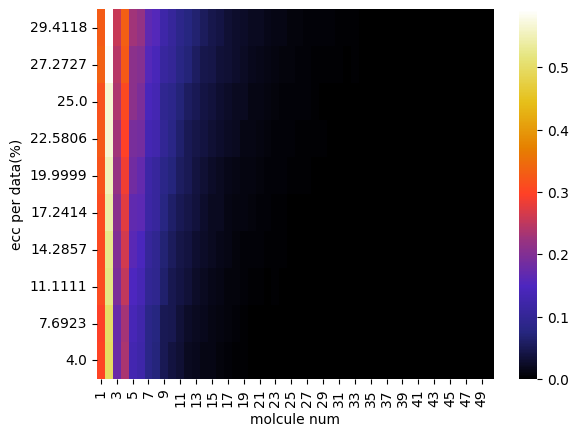

In [21]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

ecc_param_to_percentage = {
    1: 4.0000,
    2: 7.6923,
    3: 11.1111,
    4: 14.2857,
    5: 17.2414,
    6: 19.9999,
    7: 22.5806,
    8: 25.0000,
    9: 27.2727,
    10: 29.4118
}


# CSVファイルからパラメータを読み込む
params = pd.read_csv('sim15.csv')

# JSONファイルから結果を読み込む
with open('sim15_result.json', 'r') as f:
    results = json.load(f)

# 結果をDataFrameに変換
results_df = pd.json_normalize(results)

# index列を基準に結果をパラメータに結合
merged = params.merge(results_df, left_on=params.index, right_on='index')

merged['error_rate'] = merged['results.error_bytes_avg'] / merged['results.total_bytes']

merged['ecc_param'] = merged['ecc_param'].map(ecc_param_to_percentage)

heatmap_data = merged.pivot(index='ecc_param', columns='molcule_num', values='error_rate')

heatmap_data = heatmap_data.sort_index(ascending=False)

sns.heatmap(heatmap_data,cmap='CMRmap')

plt.ylabel("ecc per data(%)")
plt.xlabel("molcule num")

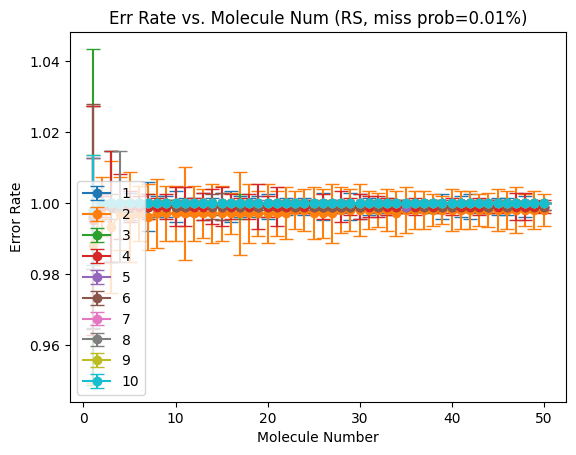

In [51]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt


# CSVファイルからパラメータを読み込む
params = pd.read_csv('sim8.csv')

# JSONファイルから結果を読み込む
with open('sim8_result.json', 'r') as f:
    results = json.load(f)

# 結果をDataFrameに変換
results_df = pd.json_normalize(results)

# index列を基準に結果をパラメータに結合
merged = params.merge(results_df, left_on=params.index, right_on='index')

merged['error_rate'] = merged['results.error_bytes_avg'] / merged['results.total_bytes']
merged['error_rate_max'] = merged['results.error_bytes_max'] / merged['results.total_bytes']
merged['error_rate_min'] = merged['results.error_bytes_min'] / merged['results.total_bytes']
merged['error_rate_std'] = (merged['error_rate_max'] - merged['error_rate_min']) / 2

f_50_merged = merged[merged['molcule_num'] <= 50]
# f_50_merged = f_50_merged [f_50_merged['ecc_param'] == 4 ]

plt.errorbar(x='molcule_num', y='error_rate', yerr='error_rate_std', data=f_50_merged, fmt='o', capsize=5)

# for ecc_param, group in merged.groupby('ecc_param'):
#     means = group.groupby('molcule_num')['error_rate'].mean()
#     errs = group.groupby('molcule_num')['error_rate_std'].mean()
#     plt.errorbar(means.index, means, yerr=errs, fmt='-o', label=ecc_param,capsize=5)


plt.title('Err Rate vs. Molecule Num (RS, miss prob=0.01%)')
plt.xlabel('Molecule Number')
plt.ylabel('Error Rate')
plt.legend()

plt.show()